In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lagrange's Method

In [56]:
# x = 0  2
# y = 7 11

x0 = 0
x1 = 2

y0 = 7
y1 = 11

x  = 1
l0 = ((x - x1) / (x0 - x1))
l1 = ((x - x0) / (x1 - x0))

y = y0*l0 + y1*l1

In [57]:
y

9.0

In [88]:
# x = 0  2  3
# y = 7 11 28

xvar = np.array([ 0., 2., 3.])
yvar = np.array([ 7.,11.,28.])

n = 3
l = []

x = 1.
for i in range(0,n):
    a = 1.
    for j in range(0,n):
        if (i != j):
            a = a * (x - xvar[j])/(xvar[i] - xvar[j])
    l.append(a)

y = 0
for i in range(0,n):
    y += yvar[i]*l[i]


print(y)

4.0


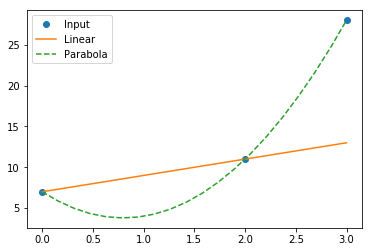

In [91]:
# Ploting graph

x = np.linspace(0,3,20)

# Linear
l0 = ((x - x1) / (x0 - x1))
l1 = ((x - x0) / (x1 - x0))

# Parabolic
l = []
for i in range(0,n):
    a = 1.
    for j in range(0,n):
        if (i != j):
            a = a * (x - xvar[j])/(xvar[i] - xvar[j])
    l.append(a)

fit1 = y0*l0 + y1*l1
fit2 = 0
for i in range(0,n):
    fit2 += yvar[i]*l[i]

plt.plot(xvar,yvar,'o',x,fit1,'-',x,fit2,'--')
plt.legend(['Input','Linear','Parabola'])
plt.show()

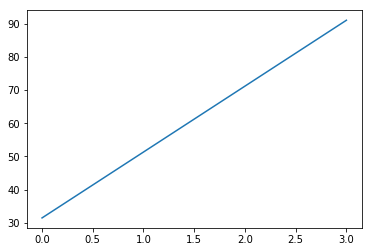

array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])

In [101]:
# Newton's Method

# x = 0  2  3
# y = 7 11 28

xvar = np.array([ 0., 2., 3.])
yvar = np.array([ 7.,11.,28.])

n = 3

a = [yvar[0]]
a.append((yvar[2] - yvar[0]) / (xvar[1] - xvar[0]))
dy1 = a[1]
dy2 = ((yvar[2] - yvar[0]) / (xvar[2] - xvar[0]))
a.append((dy2 - dy1) / (x[2] - x[1]))


p = a[0]
for i in range(0,3):
    for j in range(0,i+1):
        p += a[j] * (x - xvar[j])

plt.plot(x,p,'-')
plt.show()
x

In [ ]:
# x 0.15    2.30    3.15   4.85    6.25    7.95
# y 4.79867 4.49013 4.2243 3.47313 2.66674 1.51909